In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import reuters
import numpy as np


from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [4]:
(x_train, y_train), (x_test, y_test) = reuters.load_data()

- 당신의 모델이 개떡같은 이유!!!!
- 종속변수 label 도 안알아봤지!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

## 어떤 단어일까?

In [5]:
word_index = reuters.get_word_index()

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [7]:
idx2word = { 0:"<PAD>", 1:"<s>", 2:"<UNK>" }

In [8]:
idx2word.update({
    # +3 안겹치기 위해서 
    value + 3 : key for key, value in word_index.items()
})

In [9]:
idx2word

{0: '<PAD>',
 1: '<s>',
 2: '<UNK>',
 10999: 'mdbl',
 16263: 'fawc',
 12092: 'degussa',
 8806: 'woods',
 13799: 'hanging',
 20675: 'localized',
 20676: 'sation',
 20678: 'chanthaburi',
 11000: 'refunding',
 8807: 'hermann',
 20679: 'passsengers',
 20680: 'stipulate',
 8355: 'heublein',
 20716: 'screaming',
 16264: 'tcby',
 188: 'four',
 1645: 'grains',
 20683: 'broiler',
 12093: 'wooden',
 1223: 'wednesday',
 13800: 'highveld',
 7596: 'duffour',
 20684: '0053',
 3917: 'elections',
 2566: '270',
 3554: '271',
 5116: '272',
 3555: '273',
 3403: '274',
 7978: 'rudman',
 3404: '276',
 3481: '277',
 3635: '278',
 4312: '279',
 9384: 'dormancy',
 7250: 'errors',
 3089: 'deferred',
 20686: 'sptnd',
 8808: 'cooking',
 20687: 'stratabit',
 16265: 'designing',
 20688: 'metalurgicos',
 13801: 'databank',
 20689: '300er',
 20690: 'shocks',
 7975: 'nawg',
 20691: 'tnta',
 20692: 'perforations',
 2894: 'affiliates',
 20693: '27p',
 16266: 'ching',
 598: 'china',
 16267: 'wagyu',
 3192: 'affiliated',

In [11]:
" ".join(map(lambda x : idx2word[x], x_train[0]))

'<s> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

- 파파고 번역기 돌려본다
- 현금?

In [12]:
y_train[0]

np.int64(3)

- 3번 레이블 확인해보면 earn (이익) 에 대한 이야기구나~ 를 파악

### point!!! 단어 개수 몇개개~? 

In [14]:
len(word_index.keys())

30979

### 사용할 단어 수 테스트 ( 일단 500개 먼저 )

In [15]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 500)
idx2word = { 0:"<PAD>", 1:"<s>", 2:"<UNK>" }
idx2word.update({
    # +3 안겹치기 위해서 
    value + 3 : key for key, value in word_index.items()
})

In [16]:
" ".join(map(lambda x : idx2word[x], x_train[0]))

'<s> <UNK> <UNK> said as a result of its december acquisition of <UNK> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said <UNK> net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <UNK> <UNK> <UNK> to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash <UNK> per share this year should be 2 50 to three dlrs reuter 3'

- 단어 500개만 가지고 데이터를 확인했을때 데이터의 파악이 안되는것을 알수있다

### 1000개로 늘려보기

In [17]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 1000)
idx2word = { 0:"<PAD>", 1:"<s>", 2:"<UNK>" }
idx2word.update({
    # +3 안겹치기 위해서 
    value + 3 : key for key, value in word_index.items()
})

In [22]:
" ".join(map(lambda x : idx2word[x], x_train[4]))

'<s> <UNK> co said its board has received a proposal from chairman and chief executive <UNK> <UNK> <UNK> <UNK> to acquire <UNK> for 15 75 dlrs per share in cash <UNK> said the acquisition bid is subject to <UNK> <UNK> the <UNK> financing it said he <UNK> to <UNK> other members of senior management to <UNK> the company said <UNK> owns 30 pct of <UNK> stock and other management members another 7 5 pct <UNK> said it has <UNK> an <UNK> board committee to consider the offer and has <UNK> the annual meeting it had scheduled for march 31 reuter 3'

- 최소 단어 1000개를 써야 데이터를 알아볼 수 있다

### 문장의 길이 분석

In [23]:
lengths = np.array([len(x) for x in x_train])

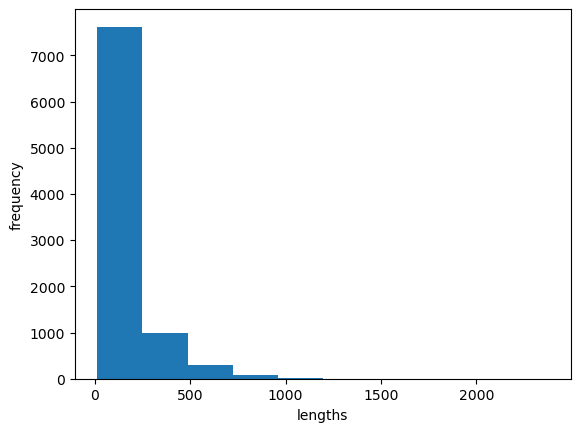

In [24]:
plt.figure()

plt.hist(lengths)

plt.xlabel("lengths")
plt.ylabel("frequency")
plt.show()

- 구간을 늘려도 앞쪽에 데이터가 몰려있다
- 대부분의 데이터를 살리는 쪽으로 가는게 맞다

In [27]:
np.mean(lengths), np.min(lengths), np.max(lengths), np.median(lengths)

(np.float64(145.5398574927633), np.int64(13), np.int64(2376), np.float64(95.0))

In [28]:
np.quantile(lengths, [0.25, 0.5, 0.75])

array([ 60.,  95., 179.])

- 평균과 중앙값 (강사님 취향) 을 커버할 수 있는 150 정도 len_max 정도로 생각하고 있다

## 데이터 분할

In [29]:
x_sub, x_val, y_sub, y_val = train_test_split(
    x_train,
    y_train, 
    test_size = 0.2,
    stratify= y_train,
    random_state = 34
)

In [30]:
x_sub.shape, x_val.shape, x_test.shape

((7185,), (1797,), (2246,))

## truncating = "post"
- 뉴스는 앞에 내용이 중요하니까
- 앞내용을 잘라야지!!!!

In [31]:
sub_seq = pad_sequences(x_sub, maxlen = 150, truncating = "post")
val_seq = pad_sequences(x_val, maxlen = 150, truncating = "post")
test_seq = pad_sequences(x_test, maxlen = 150, truncating = "post")

# 모델 설계

In [32]:
model = keras.Sequential()
model.add(keras.Input(shape = (150,)))


model.add(keras.layers.Embedding(1000, 128)) # 128개의 특성으로 표현해줄께
model.add(keras.layers.Dropout(0.2)) # 모델 복잡해지니까 ~

model.add(keras.layers.Conv1D(64, 5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation(keras.activations.relu))
model.add(keras.layers.MaxPooling1D(4)) 

model.add(keras.layers.LSTM(128, dropout = 0.2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(46, activation="softmax"))

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 150, 128)            │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 150, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 146, 64)             │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 146, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 146, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 36, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 46)                  │           5,934 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 274,030 (1.05 MB)

 Trainable params: 273,902 (1.04 MB)

 Non-trainable params: 128 (512.00 B)

In [36]:
model.compile(
    optimizer= "adam", 
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

es_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True, monitor='val_loss')

history = model.fit(
    sub_seq, 
    y_sub, 
    epochs = 100,
    batch_size = 32, 
    validation_data = (val_seq, y_val), 
    callbacks = [es_cb]
)

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5138 - loss: 1.9760 - val_accuracy: 0.6038 - val_loss: 2.0699
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6331 - loss: 1.5218 - val_accuracy: 0.6700 - val_loss: 1.3688
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6997 - loss: 1.2716 - val_accuracy: 0.7279 - val_loss: 1.1051
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7354 - loss: 1.0974 - val_accuracy: 0.7446 - val_loss: 1.0703
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7457 - loss: 1.0286 - val_accuracy: 0.7646 - val_loss: 0.9825
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7688 - loss: 0.9301 - val_accuracy: 0.7841 - val_loss: 0.9106
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7884 - loss: 0.8547 - val_accuracy: 0.7913 - val_loss: 0.8845
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8081 - loss: 0.7732 - 

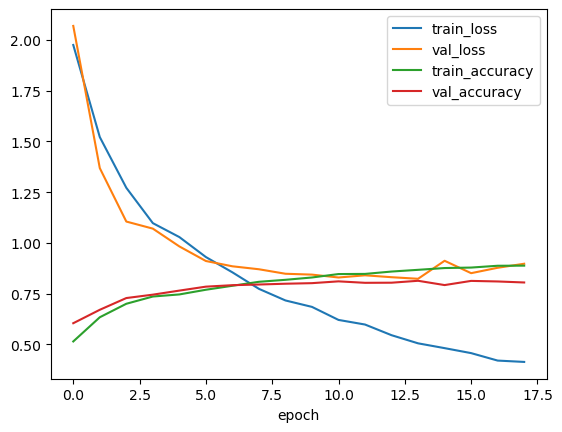

In [37]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")

plt.plot(history.history["accuracy"], label = "train_accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 과대 적합 방지가 빡세게 들어가야 될 것 같다~!

In [38]:
model.evaluate(test_seq, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7930 - loss: 0.9143 


[0.9143006801605225, 0.792965292930603]